# MSE , MAE , RMSE , R2 SCORE & AJUSTED R2 SCORE

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../../DATASET/placement.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


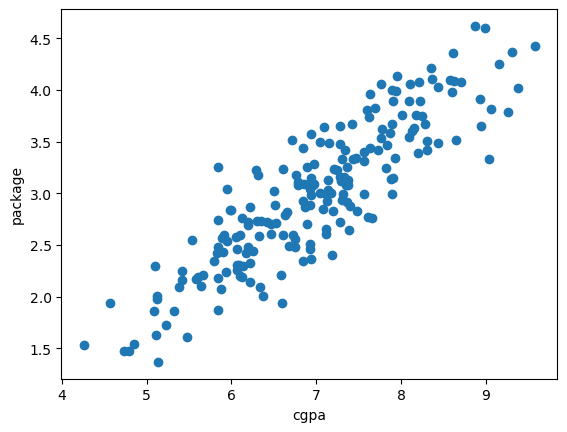

In [54]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [55]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state =2)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr=LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
lr.predict(x_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

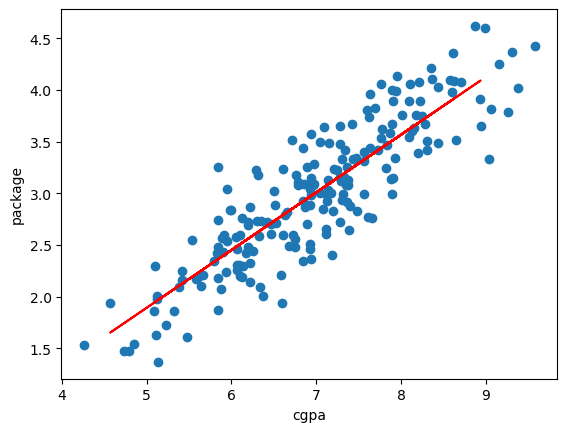

In [61]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_test,lr.predict(x_test),color='red')
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [62]:
# calculating MAE , MSE , RMSE , R2 SCORE , ADJUSTED R2 SCORE
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# to calculate all the errors we just need two values , y_test and y_pred

In [63]:
# y_pred
y_pred=lr.predict(x_test)

In [64]:
# y_test
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [65]:
# Calculating MAE
print("MAE",mean_absolute_error(y_test,y_pred))


MAE 0.2884710931878175


In [66]:
# Calculate MSE
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [67]:
# calculate RMSE 
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [68]:
# Calculate R2 Score
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.780730147510384


In [69]:
# calculating Adjusted R2 Score
# store r2 score
r2=r2_score(y_test,y_pred)

In [70]:
x_test.shape

(40, 1)

In [71]:
# r2 adj = 1 - ((1 - r2) * ( n - 1 ) / ( n - 1 - k ))
# r2 = r2 score ; n = no of rows ; k = no of independent columns
r2_adj = 1 - ((1 -r2) * (x_test.shape[0]-1) / (x_test.shape[0]-1-x_test.shape[1]))
print("R2 Adjusted Score",r2_adj)

R2 Adjusted Score 0.7749598882343415


In [72]:
# Lets add a random column to check effect on the Adjusted R2 Score
new_df1=df.copy()
new_df1['random']=np.random.random(200)
new_df1 = new_df1[['cgpa','random','package']]
new_df1.head()

,cgpa,random,package
0,6.89,0.866273,3.26
1,5.12,0.400008,1.98
2,7.82,0.406419,3.25
3,7.42,0.162428,3.67
4,6.94,0.008520,3.57


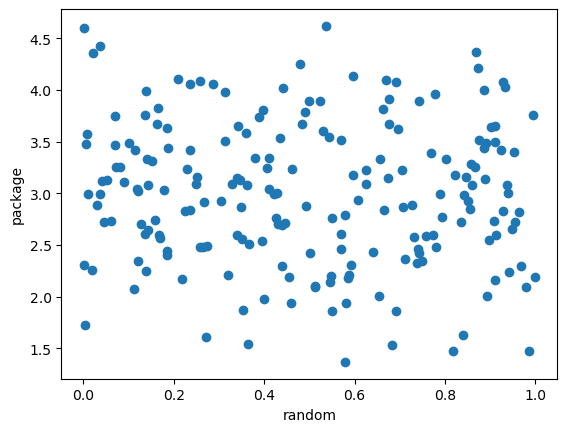

In [73]:
plt.scatter(new_df1['random'],new_df1['package'])
plt.xlabel('random')
plt.ylabel('package')
plt.show()
# This graph shows that there is no linear relationship between random and package

In [74]:
x1=new_df1.iloc[:,0:2]
y1=new_df1.iloc[:,-1]

In [75]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=2)


In [76]:
LR=LinearRegression()

In [77]:
LR.fit(x1_test,y1_test)

LinearRegression()

In [78]:
y1_pred=LR.predict(x1_test)

In [79]:
print("R2 Score",r2_score(y1_test,y1_pred))
r2_2=r2_score(y1_test,y1_pred)

R2 Score 0.7933737433781859


In [80]:
x1_test.shape

(40, 2)

In [81]:
r2_adj2 = 1 - ((1 - r2_2) * (x1_test.shape[0] -1) / (x1_test.shape[0] - 1 - x1_test.shape[1]))
print("R2 Adjusted Score",r2_adj2)

R2 Adjusted Score 0.7822047565337635


In [82]:
# Lets take another example with a feature that is related to the target variable and see how it affect the R2 Adjusted Score

new_df2 = df.copy()
new_df2['IQ']=new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','IQ','package']]

In [83]:
new_df2.head()

,cgpa,IQ,package
0,6.89,4.36,3.26
1,5.12,3.08,1.98
2,7.82,2.65,3.25
3,7.42,4.27,3.67
4,6.94,4.27,3.57


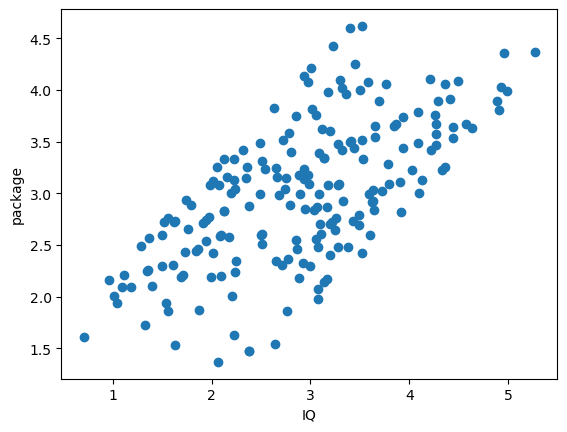

In [84]:
plt.scatter(new_df2['IQ'],new_df2['package'])
plt.xlabel('IQ')
plt.ylabel('package')
plt.show()
# As we can see there is a linear relationship between IQ and package

In [85]:
x2=new_df2.iloc[:,0:2]
y2=new_df2.iloc[:,-1]


In [86]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=2)

In [87]:
Lr=LinearRegression()

In [88]:
Lr.fit(x2_test,y2_test)

LinearRegression()

In [89]:
y2_pred=Lr.predict(x2_test)

In [90]:
print("R2 Score",r2_score(y2_test,y2_pred))
r2_3 = r2_score(y2_test,y2_pred)


R2 Score 0.8170644915994284


In [91]:
x2_test.shape

(40, 2)

In [92]:
r2_adj3 = 1 - ((1- r2_3) * (x2_test.shape[0] -1) / (x2_test.shape[0] -1 - x2_test.shape[1]))
print("R2 Adjusted Score", r2_adj3)

R2 Adjusted Score 0.807176085739938
